## CPE 4903 HW - Gradient Descent - 2nd Order Polynomial ##
Complete the code by addressing the 5 tasks describe througout the file. 
You should have the files HW "wk4 second order LR-Gradient HW.ipnb" and "HW_wk4.gradient.csv' in your working directory. Work off the .ipnb and submit that file for your assignment.

<div>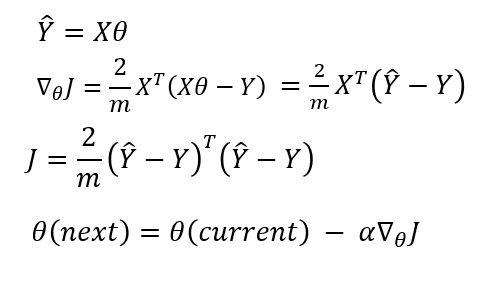<div>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Task 1: Load 'HW_wk4_gradient.csv' and create vectors x and y ##
Here is what your dataframe looks like:
<div>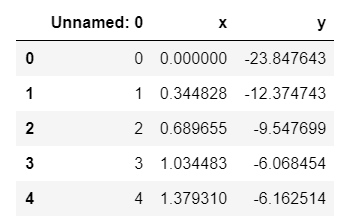<div>
Make sure that x.shape and y.shape is (m,1)

In [2]:
# your code here
# load csv file and extract vectors x and y
df = pd.read_csv('HW_wk4_gradient.csv')
x = df['x'].values
y = df['y'].values

Text(0, 0.5, 'y')

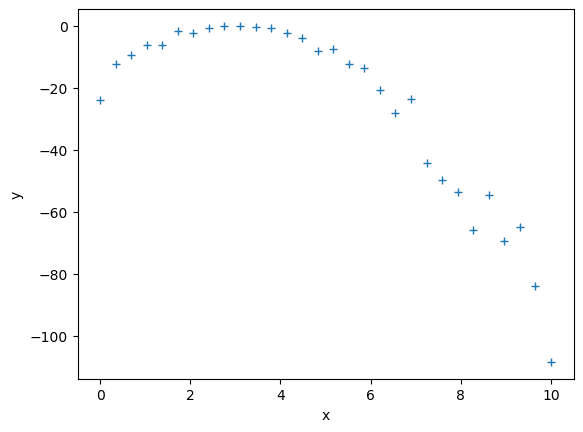

In [3]:
plt.plot(x,y,'+')
plt.xlabel('x')
plt.ylabel('y')

Scatter plot of x and y should look like this:

<div>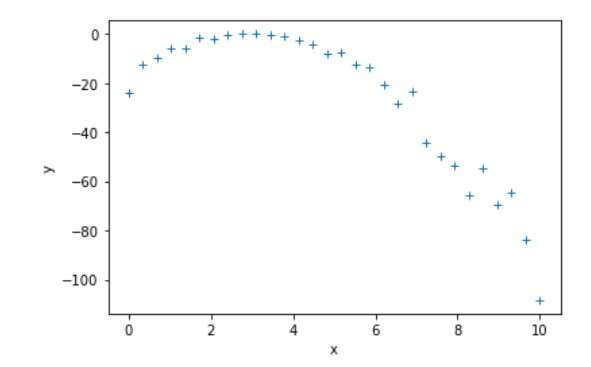<div>

In [4]:
# This section creates the feature matrix X and Target vector Y
m = len(x)
x_reshape = np.reshape(x,(m,1))
X = np.block([np.ones((m,1)), x_reshape, x_reshape**2]) #useful block command to construct bigger matrix consisting of smaller ones
Y = np.reshape(y,(m,1))
theta = np.zeros((3,1))

In [5]:
X

array([[  1.        ,   0.        ,   0.        ],
       [  1.        ,   0.34482759,   0.11890606],
       [  1.        ,   0.68965517,   0.47562426],
       [  1.        ,   1.03448276,   1.07015458],
       [  1.        ,   1.37931034,   1.90249703],
       [  1.        ,   1.72413793,   2.97265161],
       [  1.        ,   2.06896552,   4.28061831],
       [  1.        ,   2.4137931 ,   5.82639715],
       [  1.        ,   2.75862069,   7.60998811],
       [  1.        ,   3.10344828,   9.6313912 ],
       [  1.        ,   3.44827586,  11.89060642],
       [  1.        ,   3.79310345,  14.38763377],
       [  1.        ,   4.13793103,  17.12247325],
       [  1.        ,   4.48275862,  20.09512485],
       [  1.        ,   4.82758621,  23.30558859],
       [  1.        ,   5.17241379,  26.75386445],
       [  1.        ,   5.51724138,  30.43995244],
       [  1.        ,   5.86206897,  34.36385256],
       [  1.        ,   6.20689655,  38.5255648 ],
       [  1.        ,   6.55172

## Task 2 - Add gradient algorithm code ##

In [6]:
epoch = 5000
#theta = np.random.randn(2,1)
theta = np.zeros((3,1))
alpha = .0003

In [7]:
J = np.zeros((epoch,1))
X_transpose = X.transpose()
epoch_count = 0

for i in range(epoch):
    yHat = np.dot(X, theta)
    hatMinusY = yHat - Y
    deltaJ = (2 / m) * np.dot(X_transpose, (hatMinusY))
    J = (2 / m) * hatMinusY.T * hatMinusY
    theta = theta - (alpha * deltaJ)
         
print(theta)

[[-3.9003519 ]
 [ 6.04541624]
 [-1.49600838]]


Text(0.5, 0, 'Iteration')

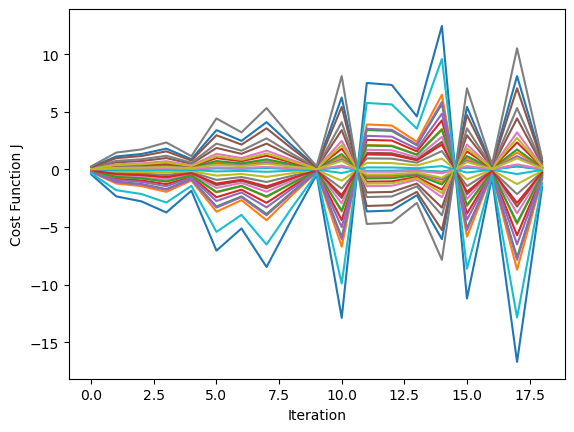

In [15]:
plt.plot(J[10:-1]) # avoid seeing initial spike that causes "zoom out" effect
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')

The fitted equation is y = -3.900 + 6.045x + -1.496x**2


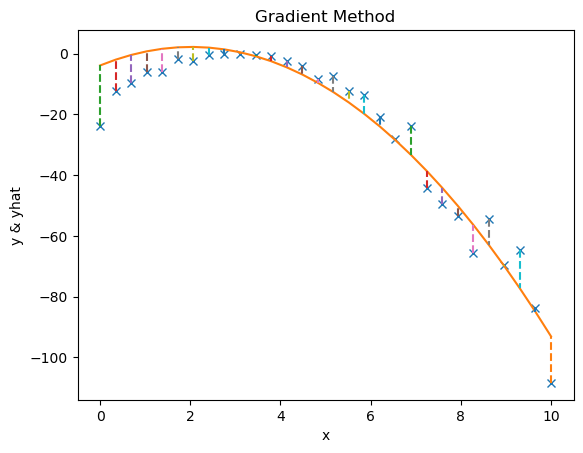

In [16]:
theta0 = theta[0,0]
theta1 = theta[1,0]
theta2 = theta[2,0]
plt.plot(x, y, 'x')
yhat = theta0 + theta1*x + theta2*x**2
plt.plot(x,yhat )
for i in range(m):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], '--')
plt.title('Gradient Method')
plt.ylabel('y & yhat')
plt.xlabel('x')
print(f'The fitted equation is y = {theta0:.3f} + {theta1:.3f}x + {theta2:.3f}x**2')

## Task 3 - Produce results for alpha = .003 and epoch = 5000 ##
With alpha = .0003 and epoch = 5000, copy/paste the plot of the fit that looks like one below:
<div>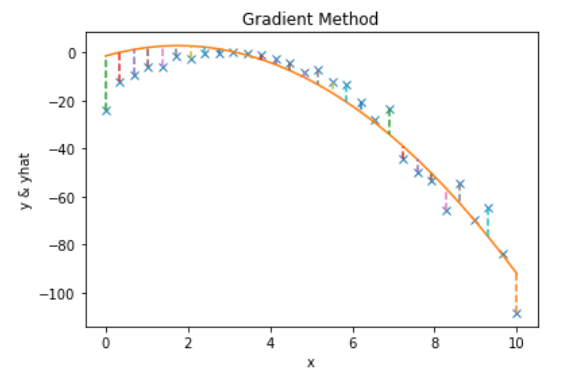<div>

In [17]:
print (f'The MSE of gradient converges to {J[-1,0]:.3f}')

The MSE of gradient converges to 20.411


Text(0.5, 0, 'x')

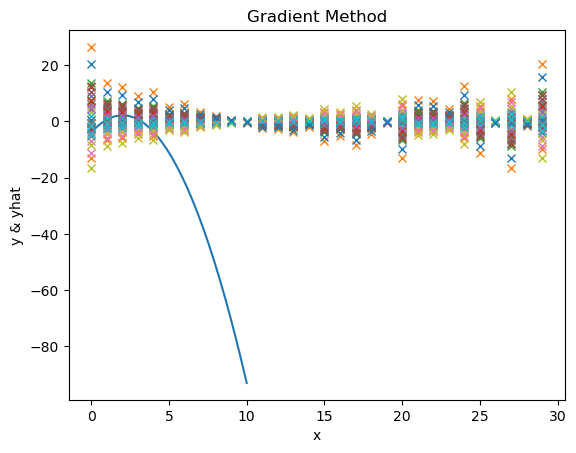

In [18]:
plt.plot(x,yhat )
for i in range(m):
    plt.plot(J[i],'x')
plt.title('Gradient Method')
plt.ylabel('y & yhat')
plt.xlabel('x')

## Task 4 - With alpha = .0003, determine the epoch size where the MSE has converged ('plateau') ##
Paste plots of J and fit (y&yhat vs x) in this cell:
 
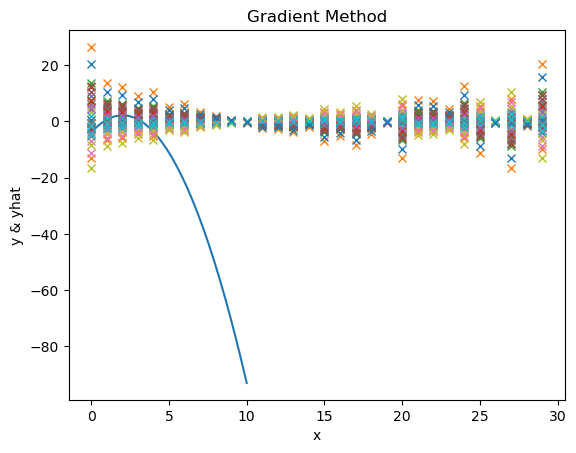

## Task 5 - What is the max alpha before divergence kicks in? ##
* max alpha = .0004
* How many iterations required to converge? Paste both J and fit plots here.
It takes about 2 iterations to converge.

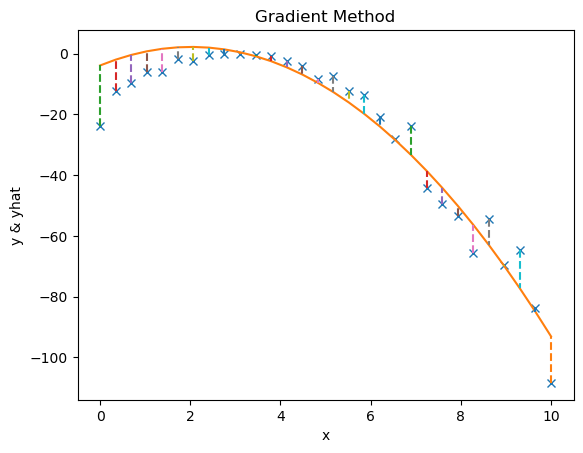
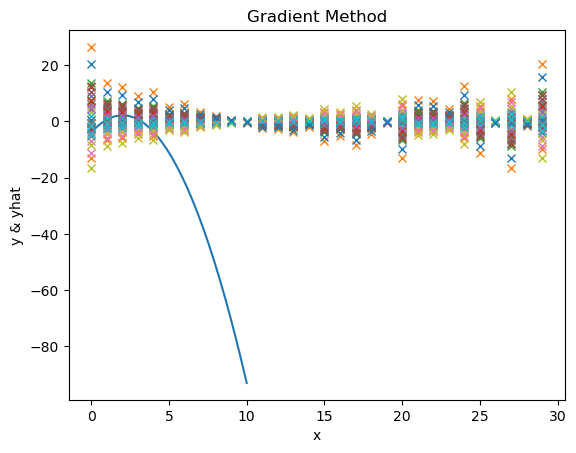
* What is the MSE? The MSE is 20.411

## Task 6 - To improve convergence rate, we can scale (standardize) the inputs ##
Below is the scatter plot of x before scaling. Create X_scaled, for every column (except the first as it is already scaled) such that xi = (xi - mean(xi))/std(xi)
<div>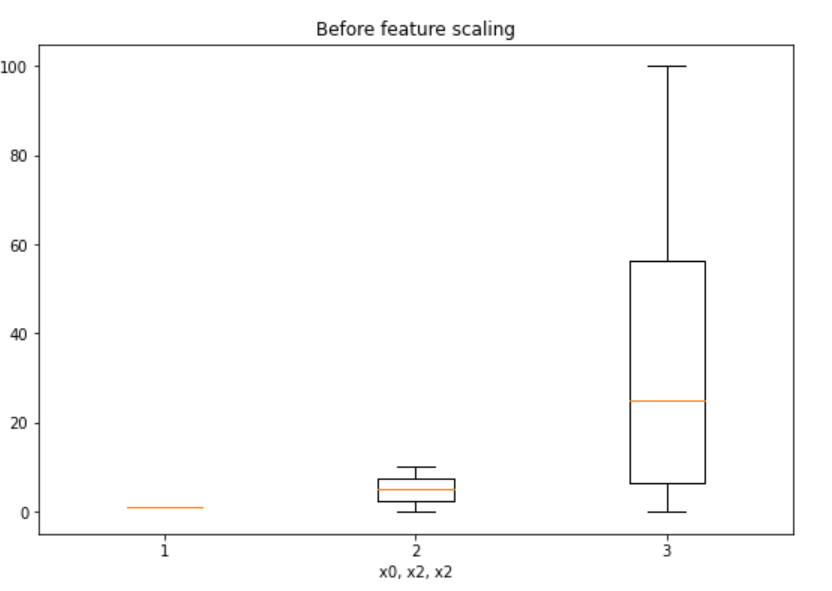<div>

Text(0.5, 1.0, 'Before feature scaling')

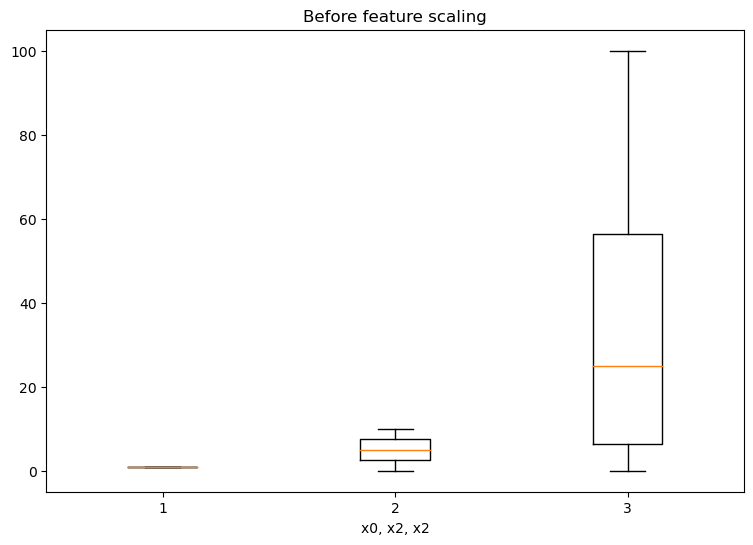

In [19]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(X)
plt.xlabel('x0, x2, x2')
plt.title('Before feature scaling')

In [20]:
X_mean = np.mean(X, axis=0) #mean of columns
mu1 = X_mean[1]
mu2 = X_mean[2]
X_var = np.var(X, axis=0)
s1 = np.sqrt(X_var[1])
s2 = np.sqrt(X_var[2])
X_scaled = X # initialize

In [21]:
# your code here to calculate X_scaled using mu1, mu2, s1, s2. Avoid using for loop and use vector operations
# outputs: updated X_scaled

Text(0.5, 1.0, 'After feature scaling')

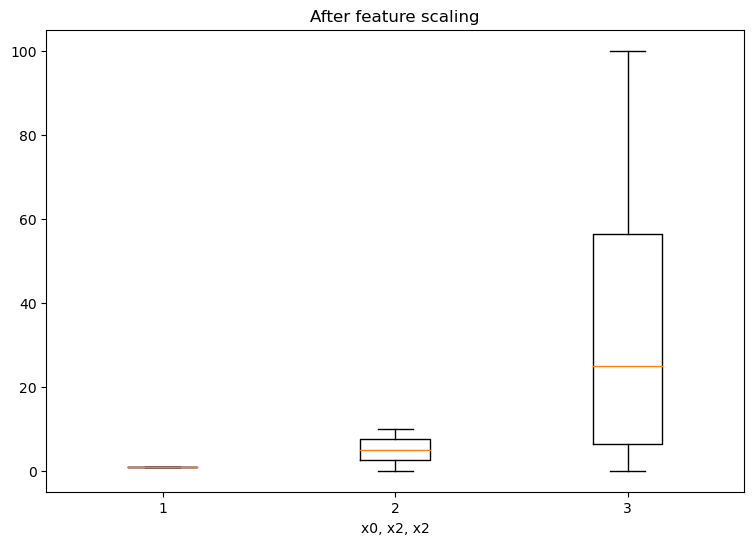

In [22]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(X_scaled)
plt.xlabel('x0, x2, x2')
plt.title('After feature scaling')

Show that your output looks like this:
<div>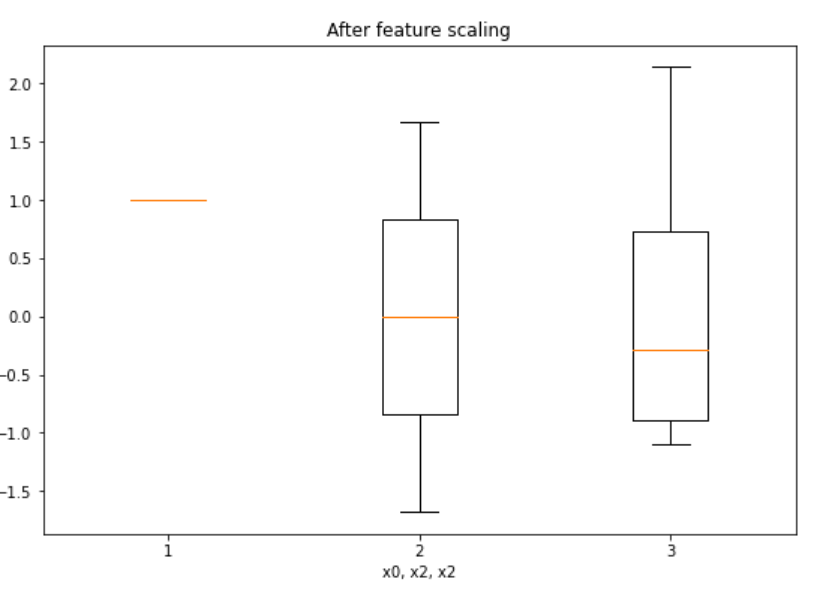<div>
